# Project  


Content: 
1. [Read the data](#read_the_data)
2. [Descriptive statistics](#descriptive_statistics)
3. TODO...

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import gzip
sns.set()
sns.axes_style("darkgrid")
sns.set_palette("Set2")

<a id='#read_the_data'></a>
# Read the data


TODO: explain what you did with hdf5 files, and why decided to save to csv


In [3]:
# read the data from previosly created csv files
reviews_df = pd.read_csv('./data/reviews_cellphones.csv')

In [4]:
metadata_df = pd.read_csv('./data/metadata_cellphones.csv')

In [5]:
ratings_cols = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
ratings_df = reviews_df[ratings_cols]

In [6]:
reviews_df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A1EWN6KZ4HMLT7,011040047X,S. Prescott,"[2, 2]","The case pictured is a soft violet color, but ...",1.0,Wrong color,1344902400,"08 14, 2012"
1,1,A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012"
2,2,A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013"
3,3,A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013"
4,4,A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1.0,Do NOT GET IT!!,1353888000,"11 26, 2012"


In [6]:
metadata_df.head()

,Unnamed: 0,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0,0110400550,"{'also_bought': ['B00C56IXFG', 'B008ZUQWOK', '...",Pink &amp; White 3d Melt Ice-cream Skin Hard C...,3.33,{'Cell Phones & Accessories': 83460},http://ecx.images-amazon.com/images/I/31zn6SOL...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Pink & White 3D Melt Ice-Cream Skin Hard Case ...
1,1,011040047X,"{'buy_after_viewing': ['B008RU7UL2', 'B00698LY...",Purple Hard Case Cover for Iphone 4 4s 4g with...,1.94,{'Cell Phones & Accessories': 495795},http://ecx.images-amazon.com/images/I/41WCZc2d...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Purple Hard Case Cover for iPhone 4 4S 4G With...
2,2,0195866479,"{'buy_after_viewing': ['B00530RXP2', 'B004SH9B...",Hello Kitty Light-weighted Chrome Case Black C...,2.94,{'Cell Phones & Accessories': 371302},http://ecx.images-amazon.com/images/I/41fy1%2B...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...","Thin and light weighted,\r\nCase's unique desi..."
3,3,0214514706,"{'buy_after_viewing': ['B0042FV2SI', 'B00869D2...",Cool Summer Breeze in the Ocean Beach Collecti...,0.94,{'Cell Phones & Accessories': 778100},http://ecx.images-amazon.com/images/I/415cmp6Q...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...
4,4,0214714705,"{'buy_after_viewing': ['B008EU7HRM', 'B00869D2...",Cool Summer Breeze In The Ocean Beach Collecti...,5.79,{'Cell Phones & Accessories': 654894},http://ecx.images-amazon.com/images/I/41XDwPt2...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...


In [7]:
ratings_df.head()

,reviewerID,asin,overall,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,1.0,1344902400
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000


<a id='#descriptive_statistics'></a>

# Descriptive statistics

TODO:
 - basic histograms and charts
 - Sort by timestamps, and check again the stats?
 - Check how many people gave the comments
 

## Reviews analysis

First, we take a look at the entire reviews dataset for cellphones and accessories.

In [8]:
unique_reviewers = reviews_df['reviewerID'].unique()
unique_reviewers_percent = len(unique_reviewers) / reviews_df.shape[0] *100
unique_products = reviews_df['asin'].unique()
unique_products_percent = len(unique_products) / reviews_df.shape[0] *100
print ("Shape: ", reviews_df.shape)
print ("Ratings values: ", reviews_df.overall.unique())
print ("Min review unix time: ", reviews_df.unixReviewTime.min())
print ("Max review unix time: ", reviews_df.unixReviewTime.max())
print ("Percentage of unique reviewers: ", unique_reviewers_percent)
print ("Percentage of unique products: ", unique_products_percent)

Shape:  (3447249, 10)
Ratings values:  [ 1.  5.  2.  3.  4.]
Min review unix time:  942796800
Max review unix time:  1406073600
Percentage of unique reviewers:  65.5898369975595
Percentage of unique products:  9.273423532793831


### Overall ratings

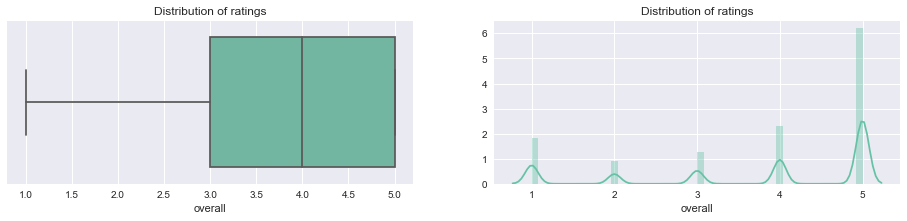

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(reviews_df.overall, ax=ax[0])
ax2 = sns.distplot(reviews_df.overall, ax=ax[1])
ax1.set_title('Distribution of ratings')
ax2.set_title('Distribution of ratings')
plt.show()

### Reviews through time

In [14]:
#Re-compute datetime with unixReviewTime
reviews_df['datetime'] = pd.to_datetime(reviews_df.unixReviewTime, unit='s')

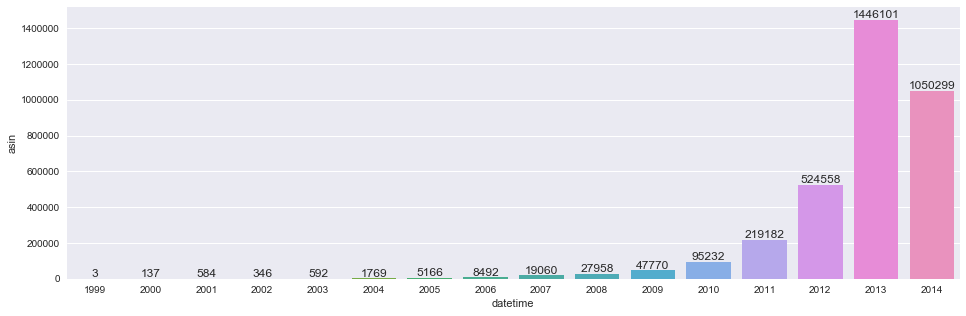

In [49]:
#By year in general
year = reviews_df.groupby([reviews_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10000,
            '{:1.0f}'.format(height),
            ha="center") 

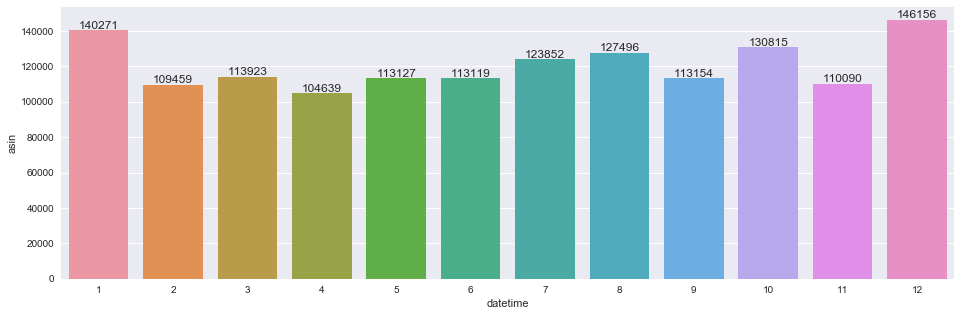

In [72]:
#In 2013 for example
year = reviews_df.groupby([reviews_df.datetime.dt.year, reviews_df.datetime.dt.month])['asin'].count()
year_2013 = year[(2013, )]
fig, ax = plt.subplots(figsize=(16,5))
year_2013_df = pd.DataFrame(year_2013)
ax = sns.barplot(year_2013_df.index, year_2013_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.0f}'.format(height),
            ha="center") 

## Metadata dataset

### Row data analysis

In [73]:
null_price = metadata_df.price.isnull().sum()
null_price_percent = null_price / metadata_df.shape[0] *100
null_brand = metadata_df.brand.isnull().sum()
null_brand_percent = null_brand / metadata_df.shape[0] *100
print ("Number of products: ", metadata_df.shape[0])
print ("Percentage of null prices: ", null_price_percent)
print ("Percentage of null brands: ", null_brand_percent)

Number of products:  346793
Percentage of null prices:  18.4098294948
Percentage of null brands:  77.3873751777


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F652973860>]], dtype=object)

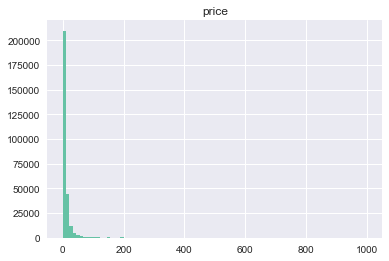

In [74]:
metadata_df.hist(column='price', bins=90)

In [75]:
# ^ something is not fine with the prices, seems like too much of the prices are 0
# but when we count, around 18% of the prices is null
# TODO: determine the brands
# TODO: find the average price per brand
# TODO: check if you have metadata for each phone from the reviews list

In [76]:
#metadata_df.categories[346768].split('[[')[1].split(",")[1].replace('\'', '')

## Phones analysis


Creating new meta dataframe that only contains information about phones.

In [77]:
phones_df = metadata_df[metadata_df.categories.str.
            startswith("[['Cell Phones & Accessories', 'Cell Phones', 'Unlocked ")]
phones_df = phones_df[(pd.notnull(phones_df['brand'])) & (phones_df['brand'] != '')]
print("Phones count:", len(phones_df))
phones_df.head()

Phones count: 1343


,Unnamed: 0,asin,related,title,price,salesRank,imUrl,brand,categories,description
2861,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...
3702,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...
5456,5456,B000GGO5KO,"{'also_viewed': ['B000PEOLAG', 'B00A6D9WLY', '...",Sony Ericsson M600i Unlocked Cell Phone with 3...,120.00,{'Cell Phones & Accessories': 1178113},http://ecx.images-amazon.com/images/I/21I6mmuz...,Sony Ericsson,"[['Cell Phones & Accessories', 'Cell Phones', ...",Put your office in your pocket with the incred...
6575,6575,B000J0YH9Q,"{'also_viewed': ['B0014TAFPG'], 'buy_after_vie...",Motorola RIZR Z3 Unlocked GSM Quadband Cell Ph...,99.99,{'Cell Phones & Accessories': 697207},http://ecx.images-amazon.com/images/I/51opABnP...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The Motorola RIZR Z3 features an ultra smooth ...
6654,6654,B000J6EXTY,"{'also_bought': ['B000IN5ZHM', 'B0009H2M1Y', '...",Motorola RAZR V3i Dolce &amp; Gabbana Unlocked...,69.95,{'Cell Phones & Accessories': 16025},http://ecx.images-amazon.com/images/I/41VTMFSG...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",You've probably seen the wildly popular Motoro...


### Brand names

In [78]:
gsmarena_df = pd.read_csv('./data/phone_dataset.csv', error_bad_lines=False)
gsmarena_df.head()

b'Skipping line 821: expected 40 fields, saw 41\nSkipping line 6060: expected 40 fields, saw 41\nSkipping line 6663: expected 40 fields, saw 41\n'


,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,...,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,...,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,...,4.0| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...


In [79]:
list_brands_accepted = gsmarena_df.brand.str.lower().unique()

In [80]:
#Keep only phones contained in list of accepted brands
# TODO: becareful
print(phones_df['brand'].str.lower().unique())
brands_number_before = len(phones_df['brand'].str.lower().unique())
phones_df_filtered = phones_df[phones_df['brand'].str.lower().isin(list_brands_accepted)]
brands_number_after = len(phones_df_filtered['brand'].str.lower().unique())
print('')
print('Before processing (# of brands, # of phones):', brands_number_before, len(phones_df))
print('After processing (# of brands, # of phones):', brands_number_after, len(phones_df_filtered))


['motorola' 'sony ericsson' 'nokia' 'global star' 'sony' 'blackberry' 'lg'
 'htc' 'apple' 'pharos' 'panasonic' 't mobile' 'palm' 'cricket' 'telular'
 't-mobile' 'curve 8350i' 'samsung' 'inmarsat' 'vip-top sales watch phone'
 'dell' 'droid' 'bolo brands' 'unlocked-cell-phones' 'huawei' 'pantech'
 'hp' 'at&amp;t' 'verizon' 'victor' 'cellularfactory' 'sharp' 'unknown'
 'casio' 'generic' 's lll' 'ulefone' 'phone merchant' 'greatcall'
 'novatel wireless' 'star' 'unnecto' 'alcatel' 'jeg &amp; sons, inc.' 'svp'
 'android' 'gray' 'fujimoto dengyo' 'newcay' 'flylink' 'ebest' 'px phone'
 'digital family' 'huawei honor' 'albanese' 'jiayu g3t' 'kyocera' 'weikin'
 'lenovo' 'zte' 'blu' 'fusion 2' 'etree' 'caterpillar' 'indigi'
 'huhushop(tm)' 'zopo' 'toto' 'tomtop' 'samsung galaxy s4 - google edition'
 'samsung galaxy mega' 'jiayu' 'ct-miami llc' 'terrapin' 'lumia'
 'moneysaving4you' 'nec' 'tab 3 8&quot;' 'ocean cross' 'unassigned' 'thl'
 'dracotek' 'yezz wireless' 'u watch' 'eson' 'lxl' 'migo' 'gif

In [81]:
# TODO: process duplicates ?

### Phone prices

In [82]:
print('Number of phones with NaN price:', phones_df_filtered.price.isnull().sum())

Number of phones with NaN price: 2


We can see that the prices for almost all phones are known, and most of them are in range 50-300 euros. 

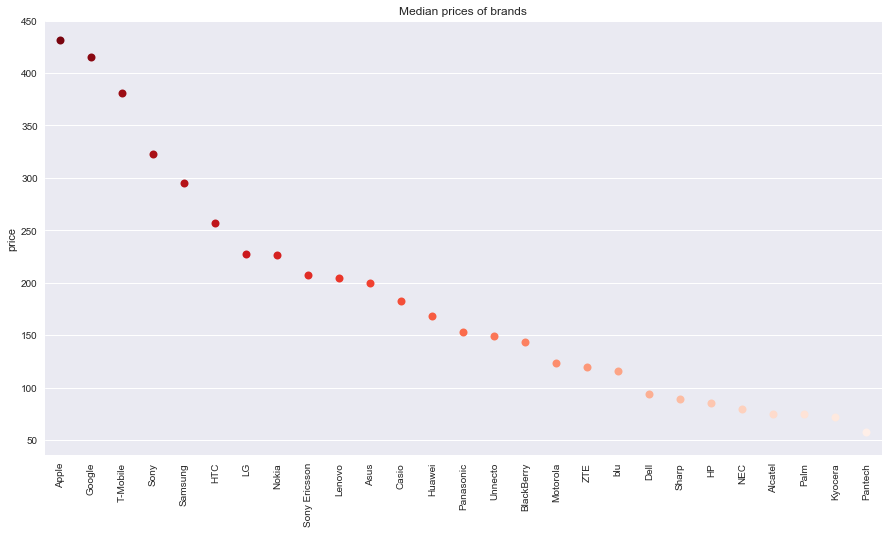

In [83]:
fig, ax = plt.subplots(figsize=(15,8))
avg_prices = phones_df_filtered.groupby('brand')['price'].mean().sort_values(ascending=False)
d = [i for i in range(0, len(avg_prices))]
ax = sns.stripplot(d, avg_prices,size=8, palette="Reds_r")
ax.set_xticklabels(avg_prices.index, rotation='vertical')
ax.set_title('Median prices of brands')
plt.show()

#sns.barplot(x=avg_prices[0:20], y=phones_df.brand[0:20], palette="Greens_r")

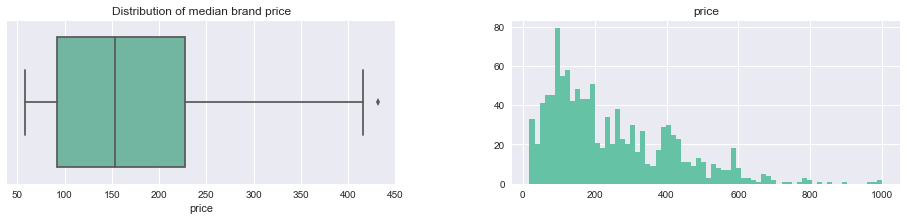

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(avg_prices, ax=ax[0])
ax2 = phones_df_filtered.hist(column='price', bins=70, ax=ax[1])
ax1.set_title('Distribution of median brand price')
ax1.set_title('Distribution of median brand price')
plt.show()

### Number of phones per brand

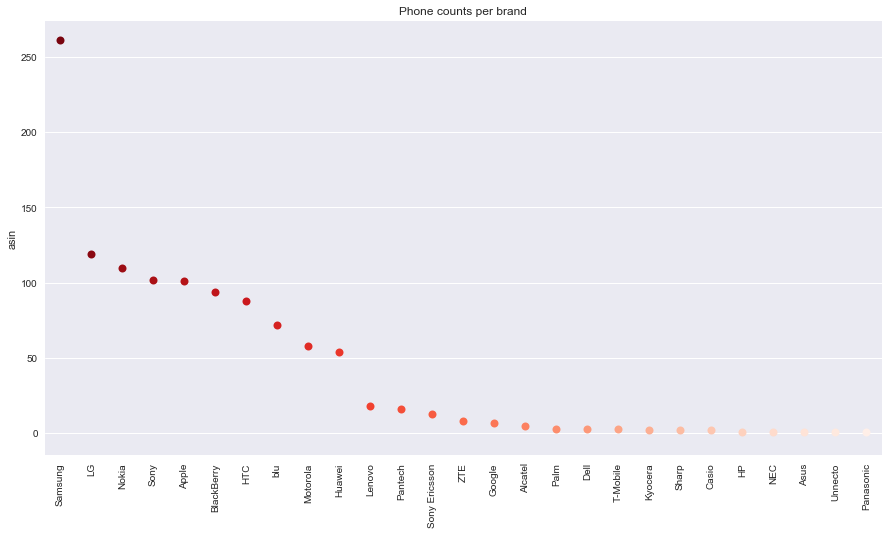

In [85]:
phone_counts = phones_df_filtered.groupby('brand')['asin'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
d = [i for i in range(0, len(phone_counts))]
ax = sns.stripplot(d, phone_counts, size=8, palette="Reds_r")
ax.set_xticklabels(phone_counts.index, rotation='vertical')
ax.set_title('Phone counts per brand')
plt.show()

## Merged dataframes for reviews and phones metadata


We will now merge these two dataframes and check statistics for new dataframe. 

In [86]:
final_df = pd.merge(phones_df_filtered, reviews_df, on='asin', how='inner')
print('Number of reviews in total:', len(final_df))

Number of reviews in total: 56222


In [87]:
final_df.head()

,Unnamed: 0_x,asin,related,title,price,salesRank,imUrl,brand,categories,description,Unnamed: 0_y,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,datetime
0,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20437,A1LZEEL11U755M,A. Le,"[2, 2]","I didn't buy from this seller, but I owned thi...",5.0,sturdiest phone ever!,1240012800,"04 18, 2009",2009-04-18
1,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20438,A21BFCRY0I0RD7,"Jose Carlos P. Reyes ""otomed""","[4, 4]",I've been using a Motorola V190 for well over ...,5.0,Good phone for day to day use,1261958400,"12 28, 2009",2009-12-28
2,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20439,A2ND5GHEMRZV0D,Leonila Romualdo,"[1, 5]",order took 2 weeks because the package came ba...,2.0,motorola from freehasslecell.com,1235433600,"02 24, 2009",2009-02-24
3,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...,37599,A36EJJUDZ37UHS,NaN,"[4, 4]",I've ordered 3 of these phones from 2 differen...,1.0,phone is nothing but problems - not authentic ...,1200096000,"01 12, 2008",2008-01-12
4,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...,37600,A2T8YGL2PJJ93A,4004CII,"[8, 9]","I read the other reviews, heard about the drea...",2.0,What a piece of junk!,1158710400,"09 20, 2006",2006-09-20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6A2747EF0>]], dtype=object)

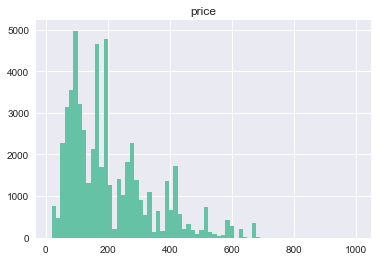

In [88]:
final_df.hist(column='price', bins=70)

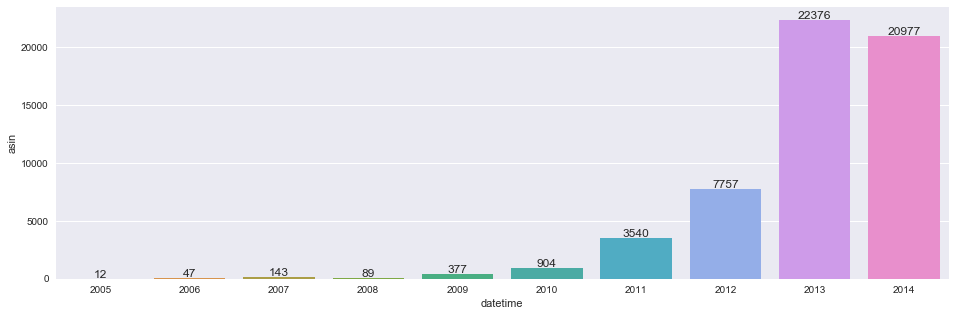

In [91]:
#By year in general
year = final_df.groupby([final_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            ha="center") 

In [134]:
### Top10 prominent brands
brand_ratings = final_df.groupby('brand').agg({'overall':['mean','std']})

brand_ratings_df = pd.DataFrame(brand_ratings.overall)
#ax = sns.barplot(brand_ratings_df.index, brand_ratings_df['mean'].sort_values(ascending=False), palette="Greens_r")
brand_ratings_df.sort_values('mean', ascending=False)

,mean,std
brand,,
Kyocera,4.416667,1.088300
Google,4.347534,1.160330
Panasonic,4.250000,1.035098
Sony,4.109865,1.310141
Asus,4.000000,1.549193
blu,3.949449,1.322714
Lenovo,3.921739,1.312209
Huawei,3.836177,1.458411
Samsung,3.808519,1.536949
